<a href="https://colab.research.google.com/github/jvidorreta/TFG_SDG_JVID/blob/dev/TFG_SDG_JVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/Colab Notebooks/BBDD-Local.xlsx'

df = pd.read_excel(file_path,sheet_name='C_BBDD')

In [2]:
df.info() #muestra información sobre el tipo de datos de las columnas, el número de filas y cuántos valores nulos hay en el DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16041 entries, 0 to 16040
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        16041 non-null  int64         
 1   Tipo                      16041 non-null  object        
 2   Categoría                 1147 non-null   object        
 3   Categoría.1               7555 non-null   object        
 4   Categoría.2               3392 non-null   object        
 5   Categoría Final           16041 non-null  object        
 6   Fecha de creación         16041 non-null  datetime64[ns]
 7   Fecha solución propuesta  14606 non-null  datetime64[ns]
 8   Subcategoría              7555 non-null   object        
 9   Fecha de modificación     16041 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 1.2+ MB


In [3]:
print(df.shape) #Muestra el nº de filas y columnas en la BBDD

(16041, 10)


# Variables 
**ID:** Número de usuario que realiza la petición

**Tipo:** Sección a la que está relacionada la petición

**Categoría:** Subcategoría del tipo más concreto

**Categoría Final:** Aquí hemos agrupado en una única columna las 3 columnas de Categoría y la de tipo ya que solo habrá un único valor en estas 4 columnas, esta columna será la que se utilice para el analisis.

**Fecha de creación:** Fecha y hora en la cual se crea la petición.

**Fecha solución propuesta:** Fecha y hora en la que se estima que se va a resolver la petición.

**Subcategoría:** Subcategoría asocida a la que hace la petición.

**Fecha de modificación:** Fecha y hora en la cual se resuelve la petición.



In [4]:
#Cambiamos el nombre de algunas columnas para poder trabajar con ellas mas adelante

df.rename(columns={'Categoría Final': 'Categoria_Final'}, inplace=True)
df.rename(columns={'Fecha de creación': 'Fecha_de_creacion'}, inplace=True)
df.rename(columns={'Fecha solución propuesta': 'Categoria_Final'}, inplace=True)
df.rename(columns={'Fecha de modificación': 'Fecha_de_modificacion'}, inplace=True)

#El inplace = True hace que las modificaciones se hagan sobr el df actual en vez de crear un 
#nuevo df con las nuevas modificaciones


In [5]:
df.describe(include = 'all') #Muestra una descripción por columnas de la BBDD
                           

<ipython-input-5-71966d3f17ce>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all') #Muestra una descripción por columnas de la BBDD


,ID,Tipo,Categoría,Categoría.1,Categoría.2,Categoria_Final,Fecha_de_creacion,Categoria_Final,Subcategoría,Fecha_de_modificacion
count,1.604100e+04,16041,1147,7555,3392,16041,16041,14606,7555,16041
unique,NaN,7,3,6,2,15,15867,1691,13,13529
top,NaN,Herramientas,Extracción de datos,Uso de QLIK SENSE,Consulta sobre el modelo de datos,Uso de QLIK SENSE,2016-12-27 10:34:00,2021-08-01 12:00:00,Accesos,2022-11-16 11:30:00
freq,NaN,7555,774,3950,3077,3950,3,166,4634,12
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-23 10:22:00,2016-09-16 12:00:00,NaN,2016-09-01 16:14:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-30 14:32:00,2022-12-30 12:00:00,NaN,2022-12-31 09:50:00
mean,8.369551e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.238160e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.783170e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.351280e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Por defecto solo muestra las que contienen numeros, para que muestre todo hace falta incluir el (include = 'all')


Este método te proporciona un resumen estadístico de las columnas numéricas de un DataFrame, incluyendo la media, la desviación estándar, la mediana, los cuartiles, el mínimo y el máximo.


In [6]:
#Borramos las columnas Categoría Categoría.1 Categoría.2 Subcategoría ya que Categoria_Final recoge todas estas
df = df.drop(columns=['Categoría','Categoría.1','Categoría.2','Subcategoría'], axis=0) #axis = 1 --> se borra una columna
                                              #axis = 0 --> se borra una fila 

In [7]:

print(df.columns) #Muestra los nombres de las columnas en un DataFrame.
#Comprobamos que se hayan eliminado las columnas correctamente


Index(['ID', 'Tipo', 'Categoria_Final', 'Fecha_de_creacion', 'Categoria_Final',
       'Fecha_de_modificacion'],
      dtype='object')


In [8]:
#Creamos un campo llamado date, que usaremos para diseccionar fecha de creacion por años, meses y dias
df['date']= pd.to_datetime(df.Fecha_de_creacion)

In [9]:
df['Year'] = pd.DatetimeIndex(df.date).year
df['Month'] = pd.DatetimeIndex(df.date).month
df['Day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday

In [10]:
#Comprobamos que las columnas nuevas han sido creadas
df.describe

<bound method NDFrame.describe of             ID               Tipo                    Categoria_Final  \
0      1165252       Extracciones                Extracción de datos   
1      1165248       Extracciones                Extracción de datos   
2      1165245     Gestión de KDE                     Gestión de KDE   
3      1165034       Herramientas                  Uso de QLIK SENSE   
4      1164938       Herramientas                  Uso de QLIK SENSE   
...        ...                ...                                ...   
16036   380375  Permisos Datapool                  Permisos Datapool   
16037   380373    Modelo de Datos  Consulta sobre el modelo de datos   
16038   378538  Permisos Datapool                  Permisos Datapool   
16039   378533    Modelo de Datos  Consulta sobre el modelo de datos   
16040   378317    Modelo de Datos  Consulta sobre el modelo de datos   

        Fecha_de_creacion Categoria_Final Fecha_de_modificacion  \
0     2022-12-30 14:32:00         

In [11]:
#Creamos distintos data frames para cada año para su posterior analisis
data_2016 = df[df.Fecha_de_modificacion < '2017-01-01 00:00']
data_2017 = df[(df.Fecha_de_modificacion < '2018-01-01 00:00') & (df.Fecha_de_modificacion > '2017-01-01 00:00')]
data_2018 = df[(df.Fecha_de_modificacion < '2019-01-01 00:00') & (df.Fecha_de_modificacion > '2018-01-01 00:00')]
data_2019 = df[(df.Fecha_de_modificacion < '2020-01-01 00:00') & (df.Fecha_de_modificacion > '2019-01-01 00:00')]
data_2020 = df[(df.Fecha_de_modificacion < '2021-01-01 00:00') & (df.Fecha_de_modificacion > '2020-01-01 00:00')]
data_2021 = df[(df.Fecha_de_modificacion < '2022-01-01 00:00') & (df.Fecha_de_modificacion > '2021-01-01 00:00')]
data_2022 = df[(df.Fecha_de_modificacion < '2023-01-01 00:00') & (df.Fecha_de_modificacion > '2022-01-01 00:00')]
data_2016

,ID,Tipo,Categoria_Final,Fecha_de_creacion,Categoria_Final,Fecha_de_modificacion,date,Year,Month,Day,weekday
15814,417735,Otros,Otros,2016-12-27 10:34:00,NaT,2016-12-27 13:09:00,2016-12-27 10:34:00,2016,12,27,1
15815,417734,Otros,Otros,2016-12-27 10:34:00,NaT,2016-12-27 13:09:00,2016-12-27 10:34:00,2016,12,27,1
15816,417733,Otros,Otros,2016-12-27 10:34:00,NaT,2016-12-27 13:09:00,2016-12-27 10:34:00,2016,12,27,1
15822,417199,Otros,Otros,2016-12-22 17:12:00,2016-12-27 12:00:00,2016-12-28 09:35:00,2016-12-22 17:12:00,2016,12,22,3
15828,416637,Herramientas,Uso de otras herramientas,2016-12-21 15:43:00,2016-12-22 12:00:00,2016-12-22 12:14:00,2016-12-21 15:43:00,2016,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...
16036,380375,Permisos Datapool,Permisos Datapool,2016-09-01 15:01:00,NaT,2016-09-01 16:31:00,2016-09-01 15:01:00,2016,9,1,3
16037,380373,Modelo de Datos,Consulta sobre el modelo de datos,2016-09-01 15:00:00,NaT,2016-11-09 10:39:00,2016-09-01 15:00:00,2016,9,1,3
16038,378538,Permisos Datapool,Permisos Datapool,2016-08-24 09:31:00,NaT,2016-09-14 13:44:00,2016-08-24 09:31:00,2016,8,24,2
16039,378533,Modelo de Datos,Consulta sobre el modelo de datos,2016-08-24 09:16:00,NaT,2016-09-14 12:53:00,2016-08-24 09:16:00,2016,8,24,2


In [12]:
#Creamos nuevos data frames que consisten en la agrupación de nº de peticiones por mes mediante la función groupby
counts_2016 = data_2016.groupby(['Month']).size().reset_index(name='count')
counts_2017 = data_2017.groupby(['Month']).size().reset_index(name='count')
counts_2018 = data_2018.groupby(['Month']).size().reset_index(name='count')
counts_2019 = data_2019.groupby(['Month']).size().reset_index(name='count')
counts_2020 = data_2020.groupby(['Month']).size().reset_index(name='count')
counts_2021 = data_2021.groupby(['Month']).size().reset_index(name='count')
counts_2022 = data_2022.groupby(['Month']).size().reset_index(name='count')
counts_2022

,Month,count
0,1,300
1,2,321
2,3,400
3,4,311
4,5,394
5,6,354
6,7,248
7,8,167
8,9,285
9,10,331


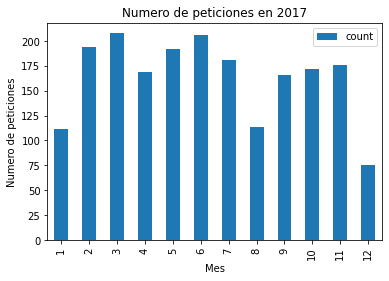

In [13]:
#Mostramos un grafico de barras para ver que se ha hecho correctamente
counts_2017.plot(x='Month', y='count',kind = 'bar')

plt.xlabel('Mes')
plt.ylabel('Numero de peticiones')
plt.title('Numero de peticiones en 2017')

plt.show()

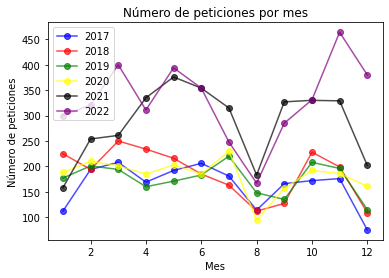

In [14]:
#Se procede a crear un grafico que muestre los distintos dataframes creados para cada año
"""
counts_2016.plot(x='Month', y='count', kind='line', color='red', ax=ax, alpha=0.7,marker = 'o')

"""

ax = counts_2017.plot(x='Month', y='count', kind='line', color='blue',alpha=0.7,marker = 'o')
counts_2018.plot(x='Month', y='count', kind='line', color='red', ax=ax, alpha=0.7,marker = 'o')
counts_2019.plot(x='Month', y='count', kind='line', color='green', ax=ax, alpha=0.7,marker = 'o')
counts_2020.plot(x='Month', y='count', kind='line', color='yellow', ax=ax, alpha=0.7,marker = 'o')
counts_2021.plot(x='Month', y='count', kind='line', color='black', ax=ax, alpha=0.7,marker = 'o')
counts_2022.plot(x='Month', y='count', kind='line', color='purple', ax=ax, alpha=0.7,marker = 'o')

ax.set_xlabel('Mes')
ax.set_ylabel('Número de peticiones')
ax.set_title('Número de peticiones por mes')
ax.legend(['2017','2018','2019','2020','2021','2022'])


plt.show()